# MLP 2024 Term 3 OPPE 2
**Date:** 8 Dec 2024

# Please regularly save your Answers in the exam portal by clicking on "Submit" button
## You can submit exam infinite time in given exam period.

In [ ]:
# @title Student's Details to be filled before the exam starts: { run: "auto", vertical-output: true, form-width: "100%", display-mode: "form" }

Student_Name = "ANTAREEP GHOSH" # @param {type:"string"}
Student_Roll_No = "23F2001127" # @param {type:"string"}

try:
  if len(Student_Name) == 0:
    raise ValueError("Warning:  Please write your name")
  elif len(Student_Roll_No)==0:
    raise ValueError("Warning: Please write your roll number")

  else:
    print(f"Best Of Luck {Student_Name}({Student_Roll_No})")

except ValueError as e:
  print(e)

Best Of Luck ANTAREEP GHOSH(23F2001127)


# Unit 1 of 2: Preprocessing

### Q. 1:

In [ ]:
import pandas as pd
df=pd.read_csv("MLP_OPPE2_24T3_preprocessing_V2.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,52.0,female,High School,60964.0,29,RENT,18000.0,MEDICAL,14.59,0.30,25.0,623,No,1
1,22.0,male,Bachelor,40477.0,1,RENT,6000.0,PERSONAL,13.85,0.15,4.0,573,Yes,0
2,29.0,female,Bachelor,75888.0,10,RENT,8000.0,HOMEIMPROVEMENT,6.62,0.11,9.0,621,No,0
3,23.0,male,High School,83939.0,2,MORTGAGE,8000.0,EDUCATION,10.95,0.10,2.0,631,Yes,0
4,38.0,female,Bachelor,78030.0,13,RENT,10000.0,DEBTCONSOLIDATION,12.06,0.13,11.0,724,No,0


### Q. 2:

In [ ]:
df["loan_intent"].value_counts()

,count
loan_intent,
EDUCATION,2070
MEDICAL,1868
VENTURE,1696
PERSONAL,1663
DEBTCONSOLIDATION,1614
HOMEIMPROVEMENT,1089


### Q. 3:

In [ ]:
male=df[(df["person_gender"]=="male") &
        (df["loan_status"]==1) &
        (df["credit_score"]<600)]
female=df[(df["person_gender"]=="female") &
        (df["loan_status"]==1) &
        (df["credit_score"]<600)]
male.shape[0]/female.shape[0]

1.0862745098039215

### Q. 4:

In [ ]:
filter=df[(df["loan_intent"]=="DEBTCONSOLIDATION")]
print("DEBTCONSOLIDATION =",filter["loan_int_rate"].mean())
filter=df[(df["loan_intent"]=="EDUCATION")]
print("EDUCATION =",filter["loan_int_rate"].mean())
filter=df[(df["loan_intent"]=="MEDICAL")]
print("MEDICAL =",filter["loan_int_rate"].mean())
filter=df[(df["loan_intent"]=="PERSONAL")]
print("PERSONAL =",filter["loan_int_rate"].mean())

DEBTCONSOLIDATION = 11.044872824631861
EDUCATION = 10.965979112271542
MEDICAL = 11.000629370629369
PERSONAL = 10.950297542043984


### Q. 5:

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
correlation1=X["person_age"].corr(X["person_income"])
correlation2=X["person_age"].corr(X["person_emp_exp"])
correlation3=X["person_age"].corr(X["cb_person_cred_hist_length"])
correlation4=X["person_emp_exp"].corr(X["cb_person_cred_hist_length"])
correlation5=X["loan_amnt"].corr(X["loan_int_rate"])
print(correlation1)
print(correlation2)
print(correlation3)
print(correlation4)
print(correlation5)

0.19452920354471004
0.953987704182503
0.8620354451497527
0.8258455463375319
0.14850927173148296


### Q. 6:



In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
y_test.sum()

433

### Q. 7:

In [ ]:
df["person_age"].dropna().mean()

27.79839496800781

### Q. 8:

In [ ]:
df["person_income"].dropna().median()

66943.5

### Q. 9:

In [ ]:
df["person_home_ownership"].value_counts()

,count
person_home_ownership,
RENT,4841
MORTGAGE,3818
OWN,579
OTHER,19


# Unit 2 of 2: Model Building

# Please regularly save your Answers in the exam portal by clicking on "Submit" button

### Q.1:

In [ ]:
import pandas as pd
data=pd.read_csv("MLP_OPPE2_24T3_modelBuilding_V1.csv")
data.shape

(10000, 20)

### Q. 2:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
log=LogisticRegression(solver="sag", random_state=42, tol=1e-3, max_iter=300)
log.fit(X_train,y_train)
log.n_iter_[0]

51

### Q. 3:

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
sgd=SGDClassifier(loss="log_loss",
                  penalty='l2',
                  max_iter=30,
                  eta0=0.01,
                  alpha=0.001,
                  random_state=42,
                  warm_start=True)
sgd.fit(X_train,y_train)
y_pred=sgd.predict(X_test)
score=f1_score(y_test,y_pred,pos_label=1)
score

0.7454128440366973

### Q. 4:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid={"n_neighbors":[11,17,23,29]}
model=GridSearchCV(estimator=KNeighborsClassifier(metric="minkowski",p=2),
                   param_grid=param_grid,
                   scoring="accuracy",
                   cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 17}

### Q. 5:

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
svm=SVC(kernel="rbf",
        decision_function_shape="ovr",
        random_state=42,
        C=1)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
cm=confusion_matrix(y_test,y_pred,labels=[0,1])
cm

array([[1492,   58],
       [ 137,  313]])

### Q. 6:



In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import sklearn
tree=DecisionTreeClassifier(criterion = 'entropy',
	                          splitter = 'random',
	                          min_samples_split = 3,
	                          min_impurity_decrease = 0.0001,
	                          random_state = 42)
tree.fit(X_train,y_train)
tree.tree_.max_depth

27

### Q. 7:

In [ ]:
tree.tree_.node_count

1709

### Q. 8:

[Text(0.5, 0.75, 'x[10] <= 0.515\nentropy = 0.77\nsamples = 8000\nvalue = [6196, 1804]'),
 Text(0.25, 0.25, '\n  (...)  \n'),
 Text(0.75, 0.25, '\n  (...)  \n')]

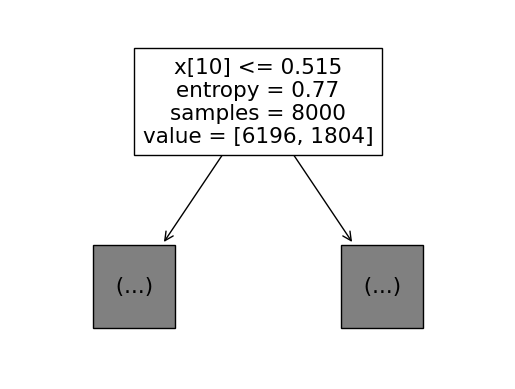

In [ ]:
plot_tree(tree,max_depth=0)

### Q. 9:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
param_grid={"n_estimators" : [13,29,37],
            "learning_rate" : [0.001,0.01,1,2]}
ada=GridSearchCV(estimator=AdaBoostClassifier(random_state=42),
                 param_grid=param_grid,
                 cv=5)
ada.fit(X_train,y_train)
ada.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

{'learning_rate': 1, 'n_estimators': 29}

### Q. 10:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


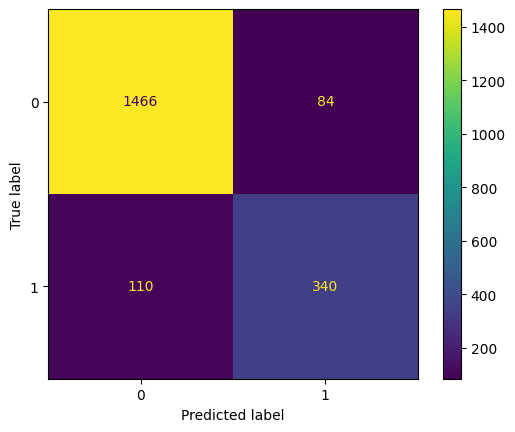

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ada2=AdaBoostClassifier(random_state=42,n_estimators=29,learning_rate=1)
ada2.fit(X_train,y_train)
y_pred=ada2.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada2.classes_).plot()

### Q. 11:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
param_distributions={"n_estimators" : range(2,100),
                     "max_depth" : range(1,11),
                     "min_impurity_decrease" : uniform(loc=0,scale=5)}
model=RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                         param_distributions=param_distributions,
                         random_state=42,
                         n_iter=10,
                         cv=3,
                         n_jobs=-1,
                         verbose=2)
model.fit(X_train,y_train)
model.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'max_depth': 7,
 'min_impurity_decrease': 3.982714934301164,
 'n_estimators': 16}

Q. 12:

In [ ]:
from sklearn.metrics import accuracy_score
model_nu=RandomForestClassifier(n_estimators=16,
                                max_depth=7,
                                min_impurity_decrease=3.982714934301164,
                                random_state=42)
model_nu.fit(X_train,y_train)
y_pred=model_nu.predict(X_test)
score=accuracy_score(y_test,y_pred)
score

0.775

# Please regularly save your Answers in the exam portal by clicking on "Submit" button